# Chicago Car Crashes

## Introduction

### Project Overview

This project aims to tackle the pressing issue of traffic accidents in urban environments, specifically focusing on the city of Chicago. Traffic accidents not only pose significant risks to public safety but also incur considerable costs in terms of healthcare and infrastructure damage. By leveraging historical traffic data, the project seeks to analyze and predict the severity of crashes, providing valuable insights to improve road safety and emergency response strategies.

### Objective

The primary objective is to develop a predictive model that identifies high-risk factors contributing to severe traffic accidents. This model will assist various stakeholders, including city traffic authorities, urban planners, emergency services, and public policy makers, in implementing data-driven strategies to reduce the frequency and severity of traffic accidents.

### Scope

The project will utilize machine learning techniques to analyze historical accident data, including factors such as weather conditions, time of day, and traffic volume. The goal is to predict the likelihood of severe accidents and offer actionable recommendations for enhancing road safety measures and improving resource allocation.

## Business Understanding

### Introduction: Real-World Problem

**Problem Description:** Traffic accidents are a significant issue in urban areas like Chicago. Severe accidents can lead to serious injuries or fatalities, impacting public safety and increasing healthcare costs. Identifying factors that contribute to severe crashes and predicting their likelihood can help in formulating effective interventions to reduce their frequency and severity.

**Value Proposition:** By analyzing and predicting crash severity, the project aims to provide actionable insights that can enhance road safety and contribute to better traffic management strategies.

### Identification of Stakeholders

**Stakeholders:**

- **City Traffic Authorities:** They can use the model to focus their safety initiatives on high-risk areas and times.
- **Urban Planners:** Insights from the model can inform the design and modification of road infrastructure to reduce accident severity.
- **Emergency Services:** Understanding high-risk conditions can help in better resource allocation and response planning.
- **Public Policy Makers:** They can use the data to support policy decisions and allocate funds for road safety improvements.

**Usage of the Project:**
- **Traffic Authorities:** Implement targeted safety measures based on the identified high-risk factors.
- **Urban Planners:** Design safer roads and intersections by addressing the factors leading to severe crashes.
- **Emergency Services:** Improve response times and preparedness in high-risk areas.
- **Policy Makers:** Develop informed policies and strategies to enhance overall traffic safety.

## Data Understanding

### Data Collection

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Using the data from "Chicago Car Crash Dataset".
The dataset can be found here:
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

In [2]:
#loading the data into dataframe using pandas
df = pd.read_csv('data/Traffic_Crashes_-_Crashes_20240830.csv')

In [5]:
initial_columns = list(df.columns)
initial_columns

['CRASH_RECORD_ID',
 'CRASH_DATE_EST_I',
 'CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

### Data Exploration

In [6]:
#checking the shape of dataframe
df.shape

(867811, 48)

In [7]:
#printing the first five rows of dataframe
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [8]:
#checking the datatype of columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867811 entries, 0 to 867810
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                867811 non-null  object 
 1   CRASH_DATE_EST_I               64448 non-null   object 
 2   CRASH_DATE                     867811 non-null  object 
 3   POSTED_SPEED_LIMIT             867811 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         867811 non-null  object 
 5   DEVICE_CONDITION               867811 non-null  object 
 6   WEATHER_CONDITION              867811 non-null  object 
 7   LIGHTING_CONDITION             867811 non-null  object 
 8   FIRST_CRASH_TYPE               867811 non-null  object 
 9   TRAFFICWAY_TYPE                867811 non-null  object 
 10  LANE_CNT                       199015 non-null  float64
 11  ALIGNMENT                      867811 non-null  object 
 12  ROADWAY_SURFACE_COND          

Looking at the information above , there are 32 object type columns that need to be
taken care and also need to handle the missing values.

**Columns of the dataset represents:**

- **CRASH_RECORD_ID**  : A unique ID can be used to link to the same crash in the Vehicles                                     and people datasets. 
- **RD_NO**:             Chicago Police Department report number. 
- **CRASH_DATE_EST_I** : Crash date estimated by desk officer or reporting party.
- **CRASH_DATE** :       Date and time of crash.
- **POSTED_SPEED_LIMIT**:Posted speed limit.
- **TRAFFIC_CONTROL_DEVICE**:Traffic control device present at crash location.
- **DEVICE_CONDITION**  : Condition of traffic control device.
- **WEATHER_CONDITION** : Weather condition at time of crash.
- **LIGHTING_CONDITION**: Light condition at time of crasH.
- **FIRST_CRASH_TYPE**  : Type of first collision in crash.
- **TRAFFICWAY_TYPE**   : Trafficway type.
- **LANE_CNT**          : Total number of through lanes in either direction, excluding turn lanes.
- **ALIGNMENT**         : Street alignment at crash location.
- **ROADWAY_SURFACE_COND**:Road surface condition.
- **ROAD_DEFECT**       : Road defects.
- **REPORT_TYPE**       : Administrative report type (at scene, at desk, amended).
- **CRASH_TYPE**        : A general severity classification for the crash. Can be either Injury  
and/or Tow Due to Crash or No Injury / Drive Away.
- **INTERSECTION_RELATED_I**:A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection.
- **NOT_RIGHT_OF_WAY_I**  :Whether the crash begun or first contact was made outside of the public 
right-of-way.
- **HIT_AND_RUN_I**      : Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid.
- **DAMAGE**             : A field observation of estimated damage.
- **DATE_POLICE_NOTIFIED**: Calendar date on which police were notified of the crash.
- **PRIM_CONTRIBUTORY_CAUSE**:The factor which was most significant in causing the crash.
- **SEC_CONTRIBUTORY_CAUSE** :The factor which was second most significant in causing the crash.
- **STREET_NO**            :Street address number of crash location.
- **STREET_DIRECTION**     :Street address direction (N,E,S,W) of crash location.
- **STREET_NAME**          :Street address name of crash location.
- **BEAT_OF_OCCURRENCE**   :Chicago Police Department Beat ID.
- **PHOTOS_TAKEN_I**       :Whether the Chicago Police Department took photos at the location of the 
crash.
- **STATEMENTS_TAKEN_I**   :Whether statements were taken from unit(s) involved in crash.
- **DOORING_I**            :Whether crash involved a motor vehicle occupant opening a door into the 
travel path of a bicyclist, causing a crash.
- **WORK_ZONE_I**          :Whether the crash occurred in an active work zone.
- **WORK_ZONE_TYPE**       :The type of work zone.           
- **WORKERS_PRESENT_I**    :Whether construction workers were present in an active work zone at crash                             location
- **NUM_UNITS**            :Number of units involved in the crash. 
- **MOST_SEVERE_INJURY**   :Most severe injury sustained by any person involved in the crash.
- **INJURIES_TOTAL**       :Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries.
- **INJURIES_FATAL**       :Total persons sustaining fatal injuries in the crash.
- **INJURIES_INCAPACITATING**:Total persons sustaining incapacitating/serious injuries in the crash.  - **INJURIES_NON_INCAPACITATING**:Total persons sustaining non-incapacitating injuries in the crash. -**INJURIES_REPORTED_NOT_EVIDENT**:Total persons sustaining possible injuries in the crash.       
- **INJURIES_NO_INDICATION**:Total persons sustaining no injuries in the crash.
- **INJURIES_UNKNOWN**      :Total persons for whom injuries sustained, if any, are unknown.         

- **CRASH_HOUR**            :The hour of the day component of CRASH_DATE. 
- **CRASH_DAY_OF_WEEK**     :The day of the week component of CRASH_DATE. Sunday=1                
- **CRASH_MONTH**           :The month component of CRASH_DATE.                
- **LATITUDE**              :The latitude of the crash location.             
- **LONGITUDE**             :The longitude of the crash location.            
- **LOCATION**              :The crash location.          

In [9]:
#Basic statistics of categorical columns
df.describe(include=[object])

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,867811,64448,867811,867811,867811,867811,867811,867811,867811,867811,867811,867811,841342,867811,198932,39718,272001,867811,867811,867811,867811,867807,867810,11700,19801,2724,4903,3784,1257,865888,861664
unique,867811,2,570207,19,8,12,6,18,20,6,7,7,3,2,2,2,2,3,657833,40,40,4,1645,2,2,2,2,4,2,5,311889
top,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,Y,12/29/2020 05:00:00 PM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",02/26/2020 08:30:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,Y,Y,Y,Y,CONSTRUCTION,Y,NO INDICATION OF INJURY,POINT (-87.905309125103 41.976201139024)
freq,1,56169,30,492154,497869,682119,558098,201358,374827,847152,641531,693937,473499,634907,189438,36066,260335,543338,12,338796,357513,310476,23675,8797,16184,1835,3784,2626,1110,744828,1378


In [11]:
print(df['MOST_SEVERE_INJURY'].unique())

['NONINCAPACITATING INJURY' 'NO INDICATION OF INJURY' 'FATAL'
 'REPORTED, NOT EVIDENT' 'INCAPACITATING INJURY' nan]


### Data Visualization

**Distribution of Injury Severity**

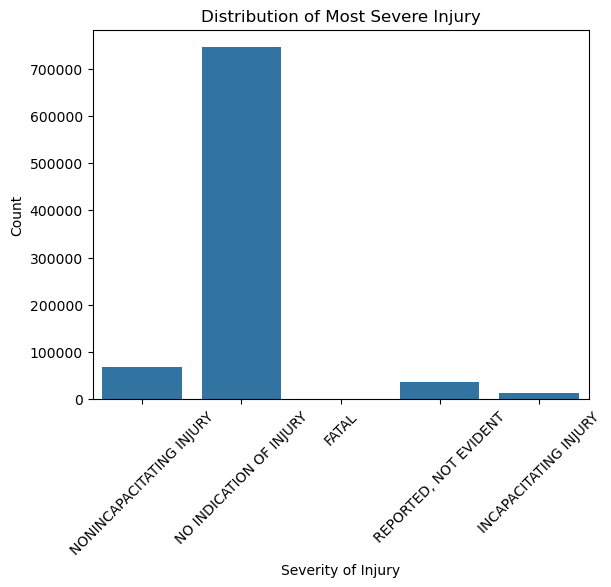

In [12]:
sns.countplot(data=df, x='MOST_SEVERE_INJURY')
plt.title('Distribution of Most Severe Injury')
plt.xlabel('Severity of Injury')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Correlation Heatmap**

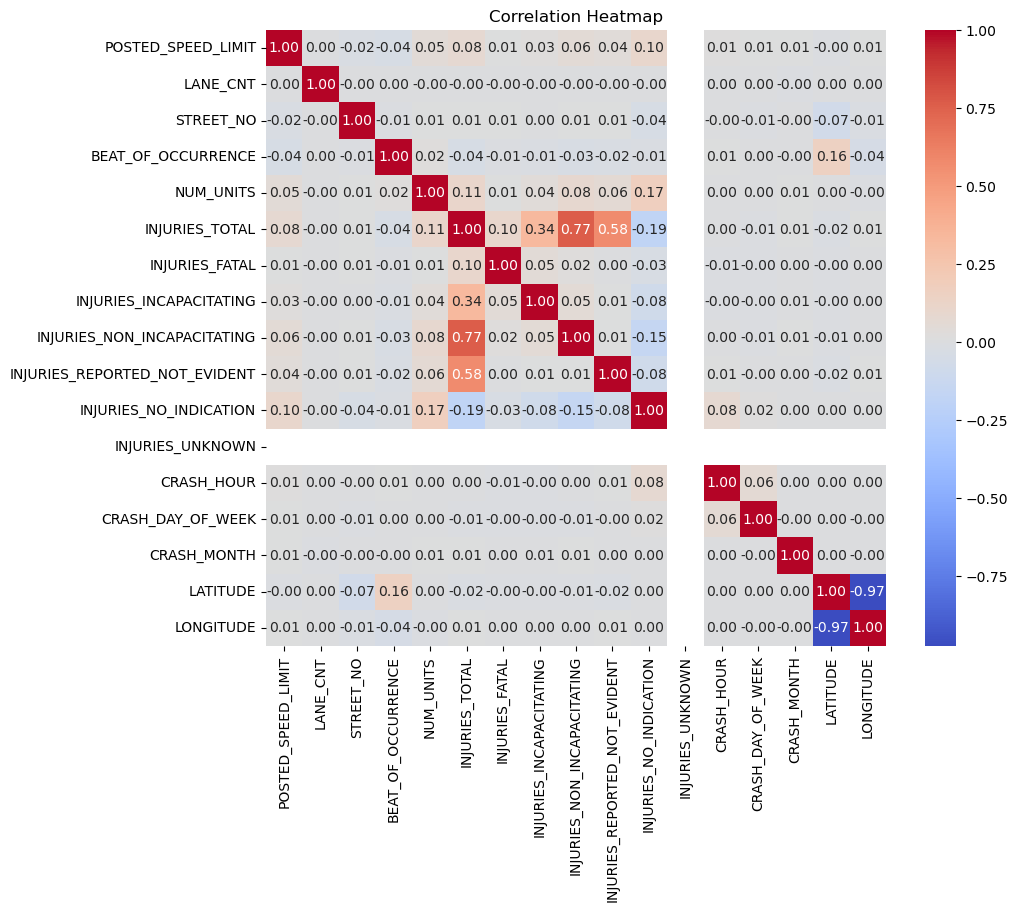

In [13]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Histograms:** Visualize the distribution of numerical variables.

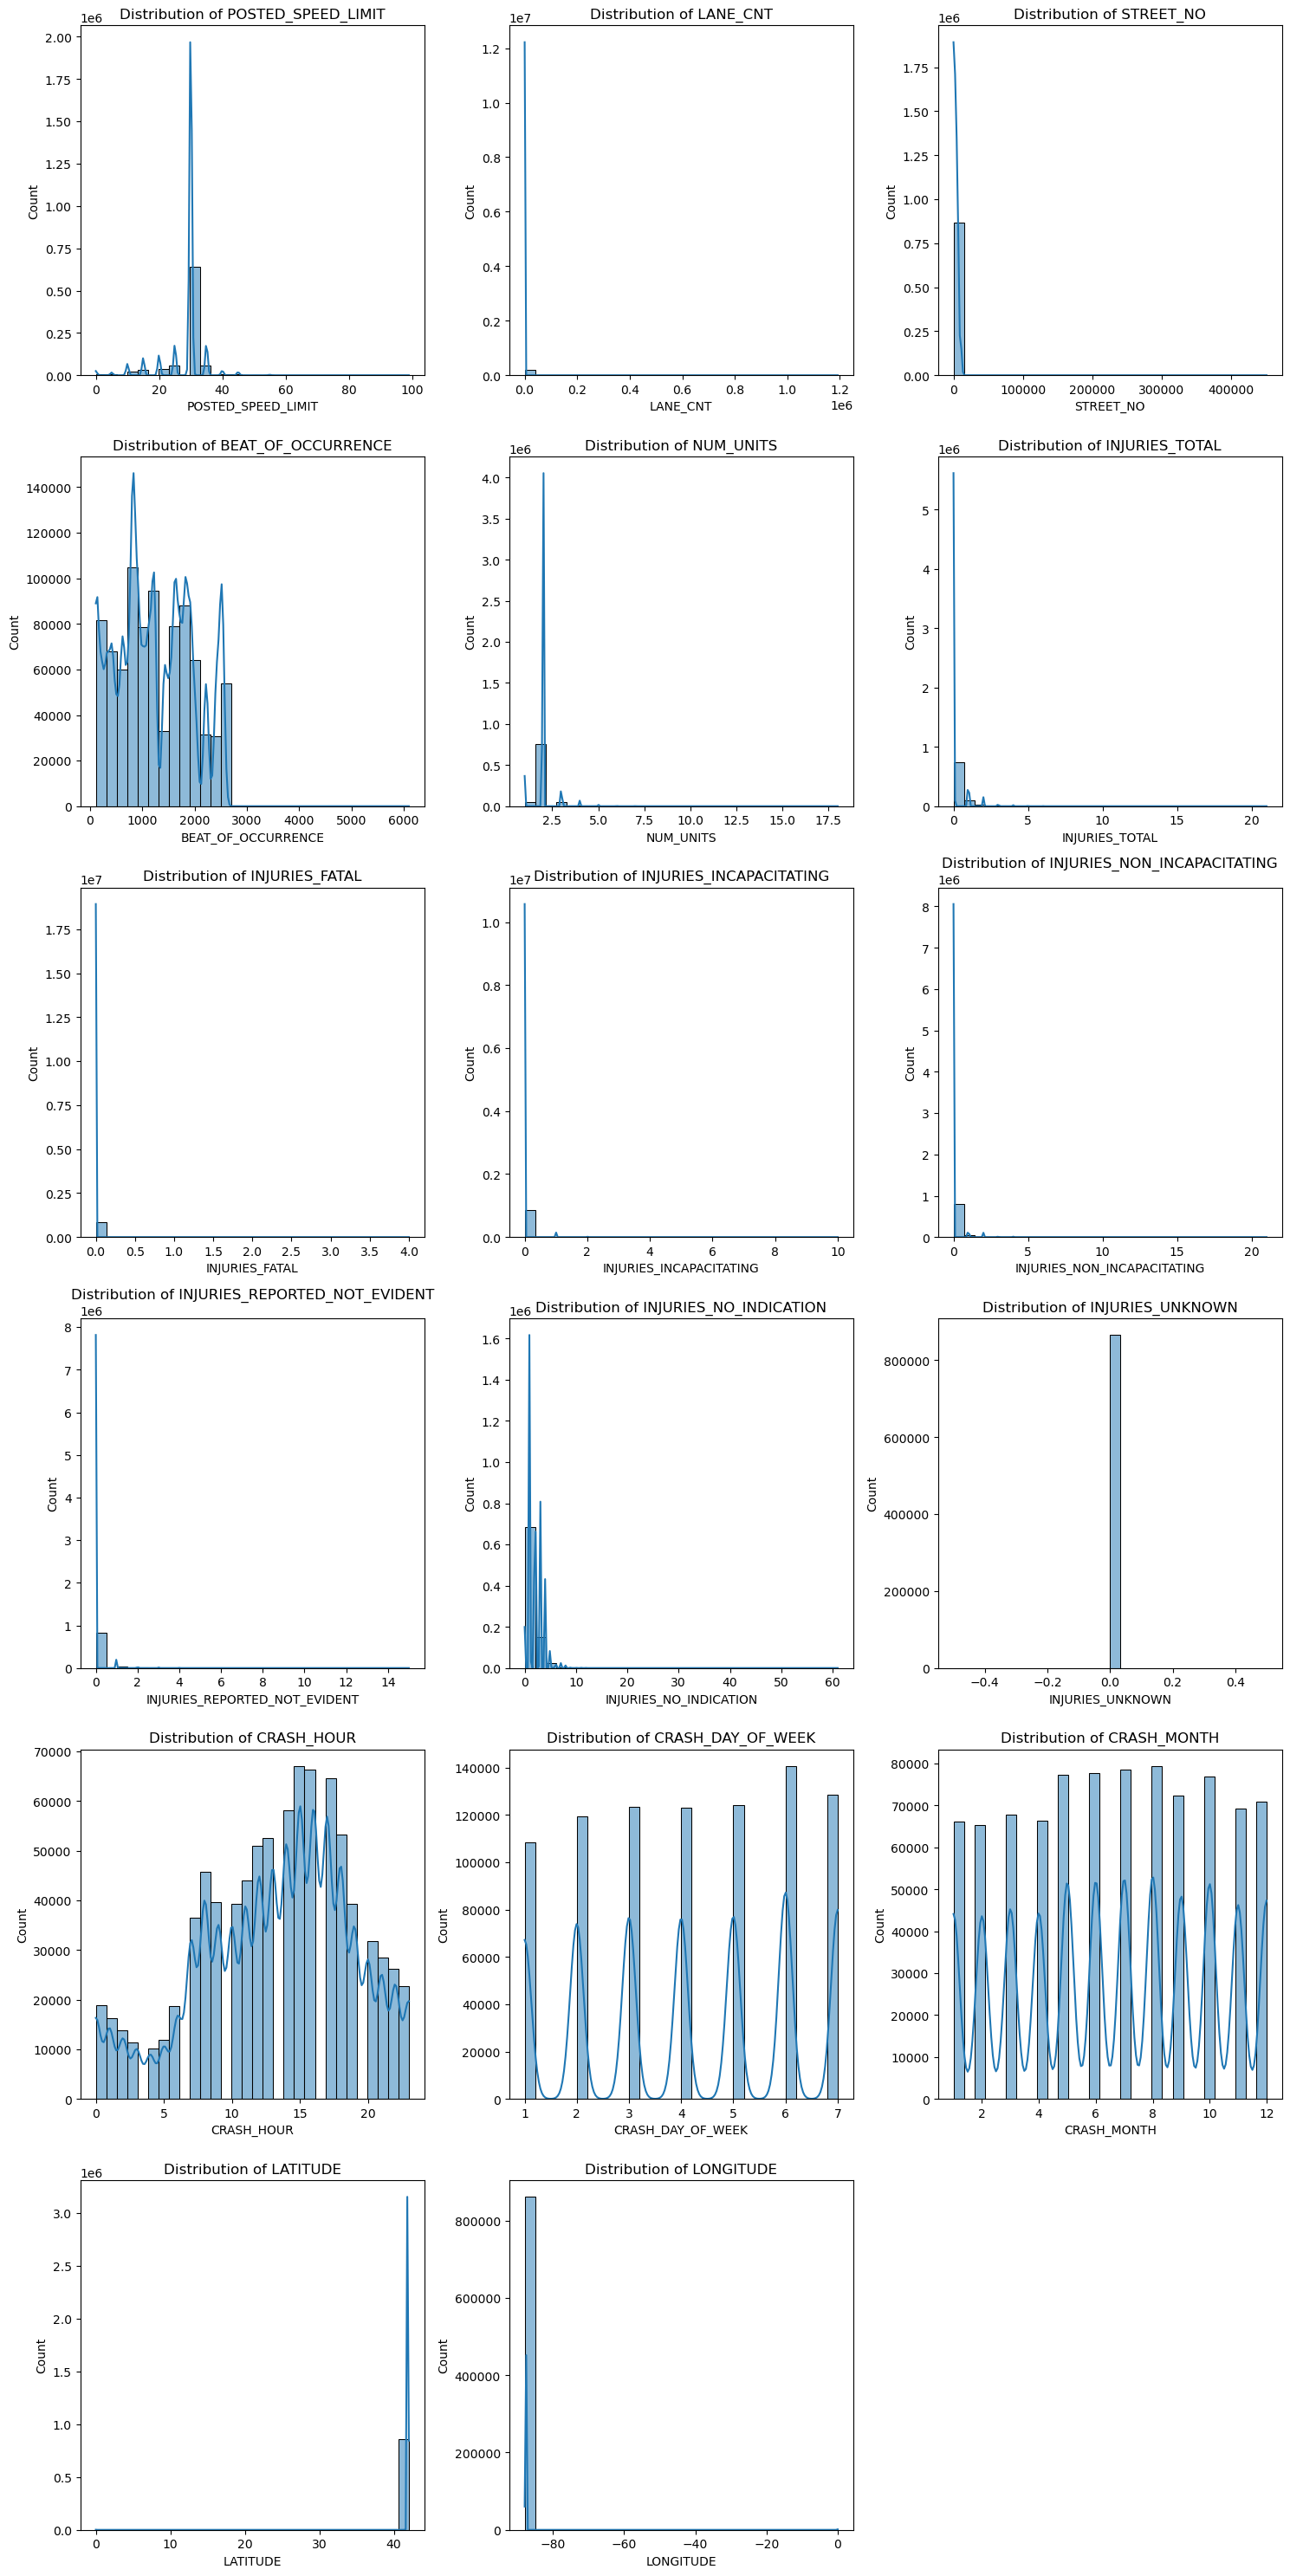

In [14]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for the subplots
num_cols = len(numerical_cols)
ncols = 3  # You can change this to adjust the layout
nrows = (num_cols // ncols) + (num_cols % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Interpretation of the distributions of the numerical features

**Distribution of LATITUDE**

Observation -The LATITUDE values are clustered within a narrow range, which aligns with the geographical area covered by the dataset. The distribution shows that most of the data points are concentrated in a specific latitude range.

Interpretation - This indicates that the accidents are occurring within a specific geographical area, likely corresponding to the city or region being studied. Since latitude alone might not directly impact injury classification, it could be combined with longitude or used in geospatial analyses.

**Distribution of LONGITUDE**

Observation -  Similar to latitude, the LONGITUDE values are tightly clustered within a narrow range, with the vast majority of values within a specific interval.

Interpretation - The longitude distribution supports the finding that the dataset is geographically concentrated in a particular region. Like latitude, longitude may not directly influence injury severity but could be useful in combination with other features or for location-based analysis.

**Distribution of NUM_UNITS**

Observation - The NUM_UNITS (number of units involved in the crash) distribution is heavily skewed to the left, with the majority of accidents involving 2-3 units. There are a few outliers with a higher number of units.

Interpretation - Most accidents involve a small number of units, typically 2-3 vehicles. The presence of outliers suggests that some accidents involve significantly more vehicles, which could be associated with more complex scenarios or higher severity, but these cases are rare.

**Distribution of POSTED_SPEED_LIMIT**

Observation - The POSTED_SPEED_LIMIT distribution shows a sharp peak around 20-40 mph, which is typical for urban areas. There are outliers at both the low and high ends of the speed limit range.

Interpretation - The concentration around 20-40 mph suggests that most accidents occur in urban settings where these speed limits are common. The outliers at lower and higher speed limits might correspond to rural or highway areas. The posted speed limit is likely an important factor in determining injury severity, especially when combined with other features like vehicle type or maneuver.

**Conclusion**

Latitude and Longitude - Both are tightly clustered, indicating a specific geographical focus. They might not be directly predictive of injury classification but could be used in combination for location-based analysis.

Number of Units - Most accidents involve a small number of units, which could influence injury severity predictions.

Posted Speed Limit - The peak around urban speed limits suggests that the speed limit is an important factor to consider in modeling injury severity.

**Box Plots:** Check for outliers and the spread of data.

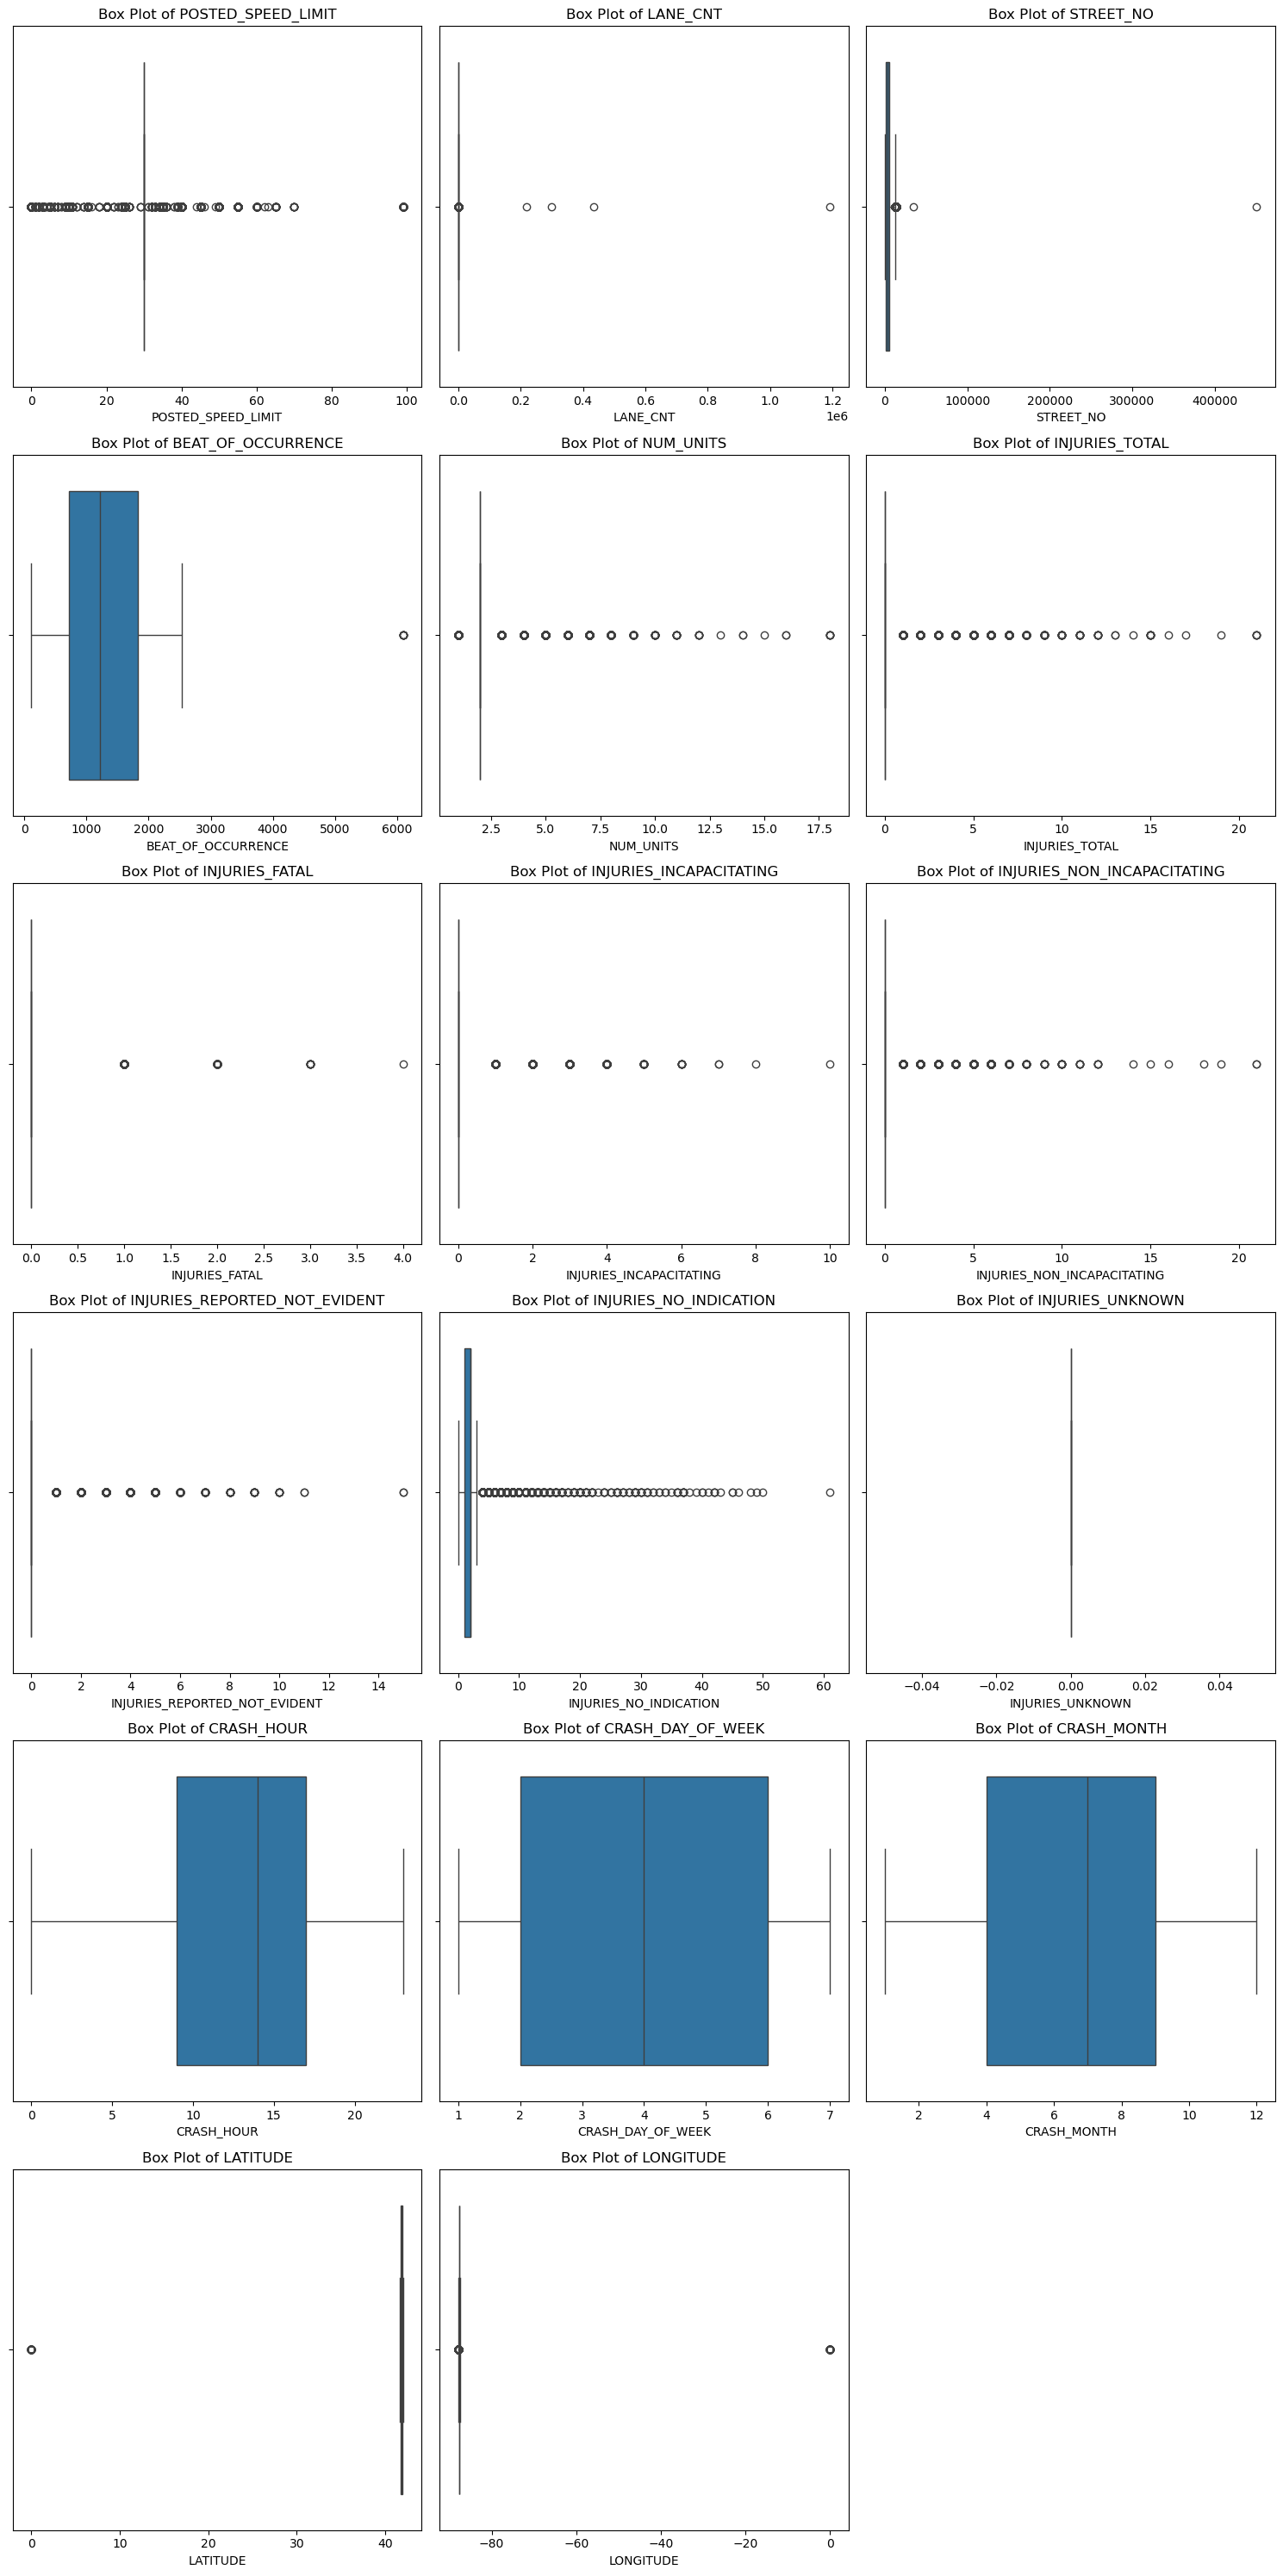

In [15]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the layout for subplots
ncols = 3  # Number of columns in the subplot grid
nrows = (len(numerical_cols) // ncols) + (len(numerical_cols) % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
axes = axes.flatten()

# Plot box plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Box Plots:** Explore the relationship between categorical and numerical variables.

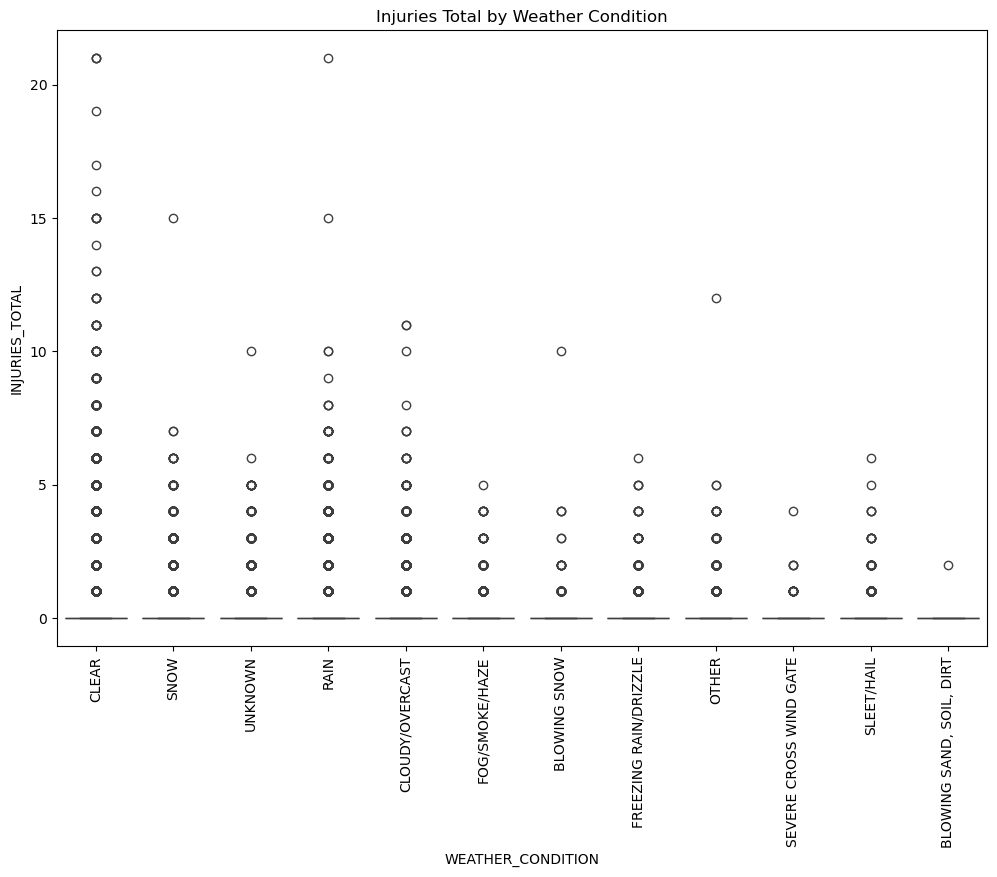

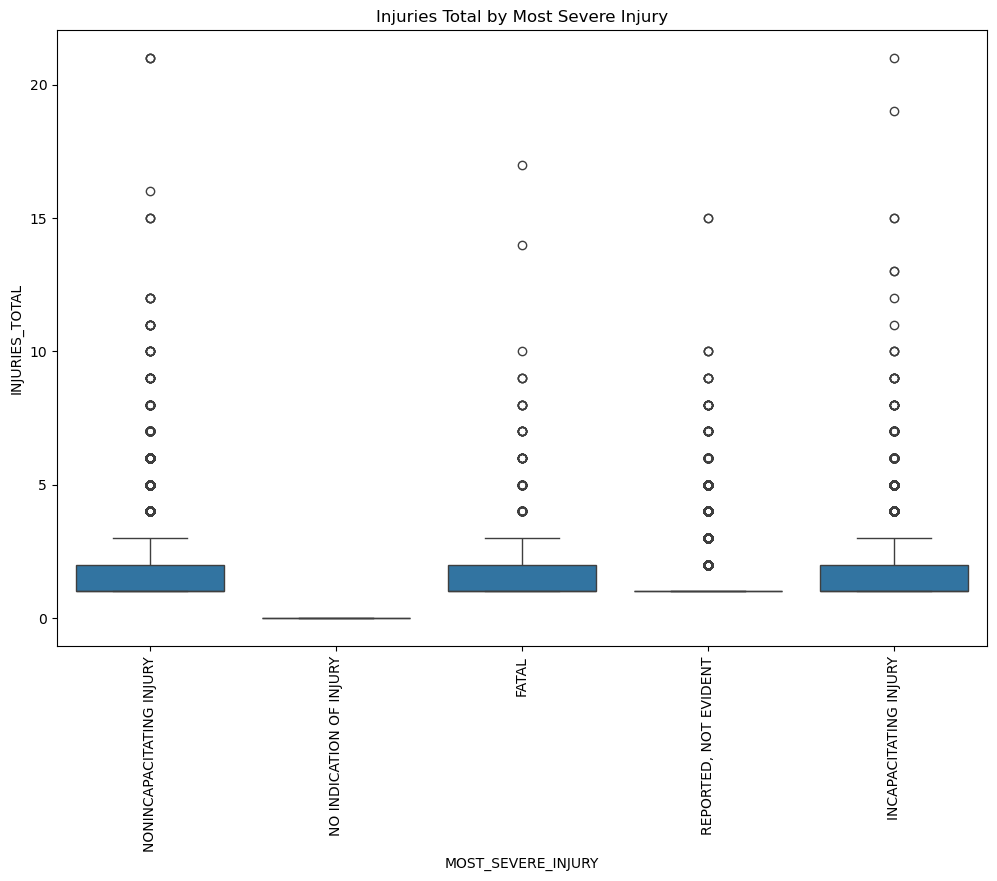

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='WEATHER_CONDITION', y='INJURIES_TOTAL')
plt.xticks(rotation=90)
plt.title('Injuries Total by Weather Condition')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='MOST_SEVERE_INJURY', y='INJURIES_TOTAL')
plt.xticks(rotation=90)
plt.title('Injuries Total by Most Severe Injury')
plt.show()

**Bar Plots:** Analyze average or sum statistics for numerical columns grouped by categorical variables.

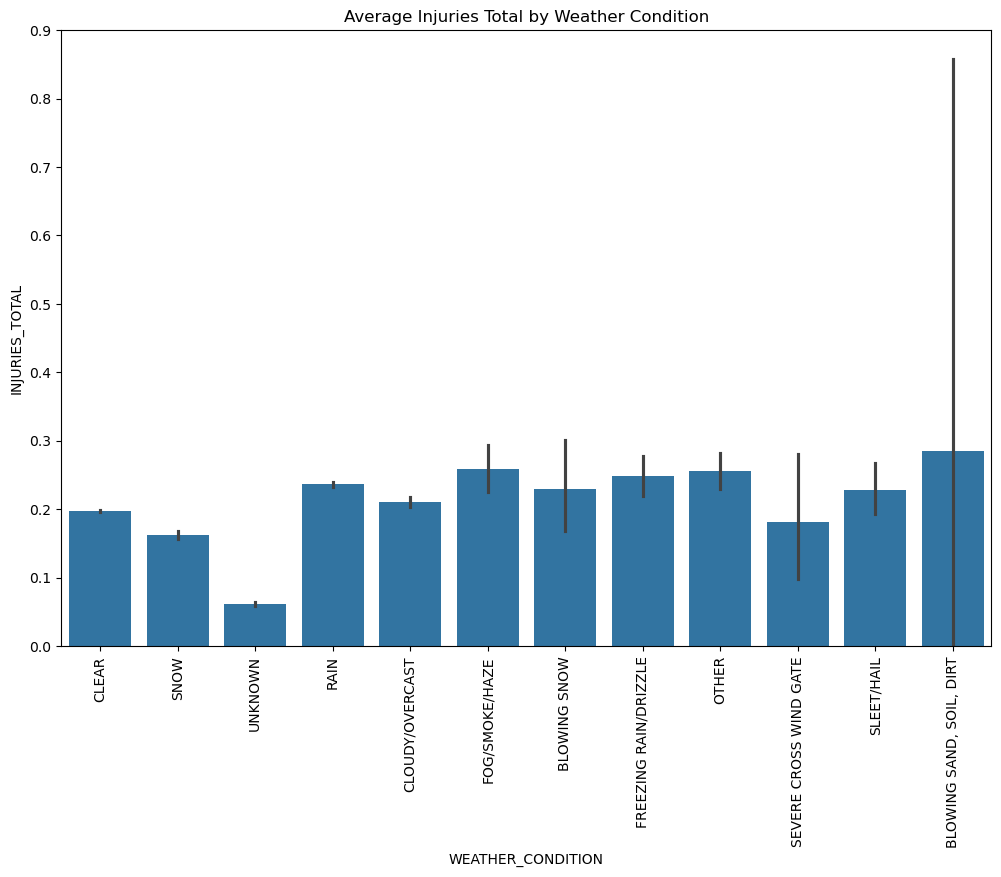

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='WEATHER_CONDITION', y='INJURIES_TOTAL', estimator='mean')
plt.xticks(rotation=90)
plt.title('Average Injuries Total by Weather Condition')
plt.show()

**Time Series Plots:** Examine trends over time if relevant columns like CRASH_DATE are included.

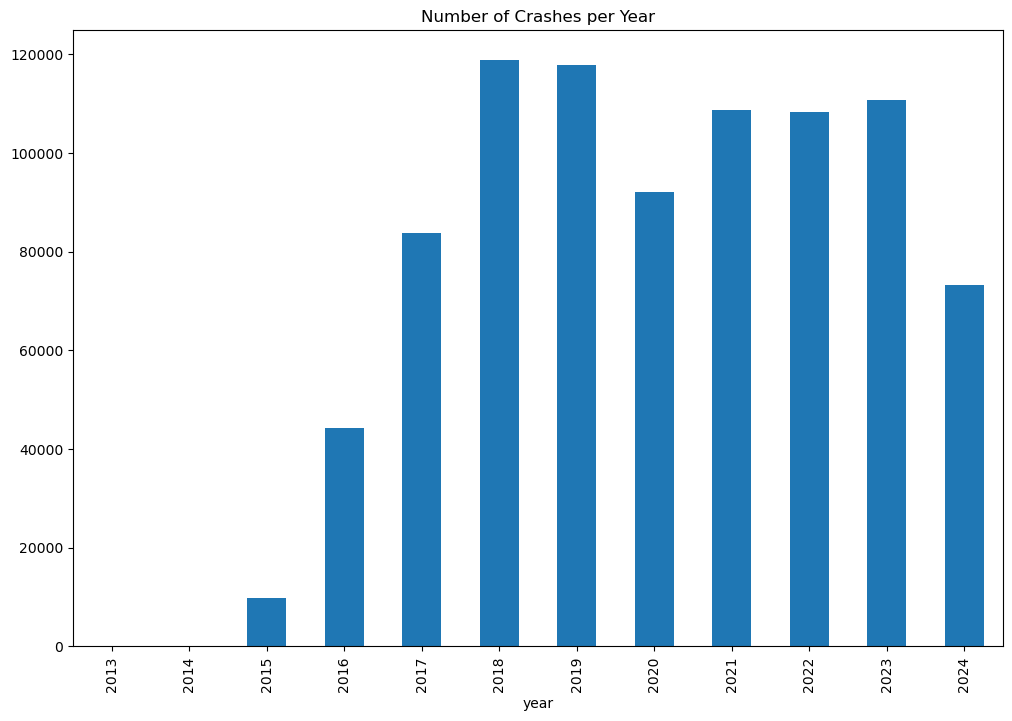

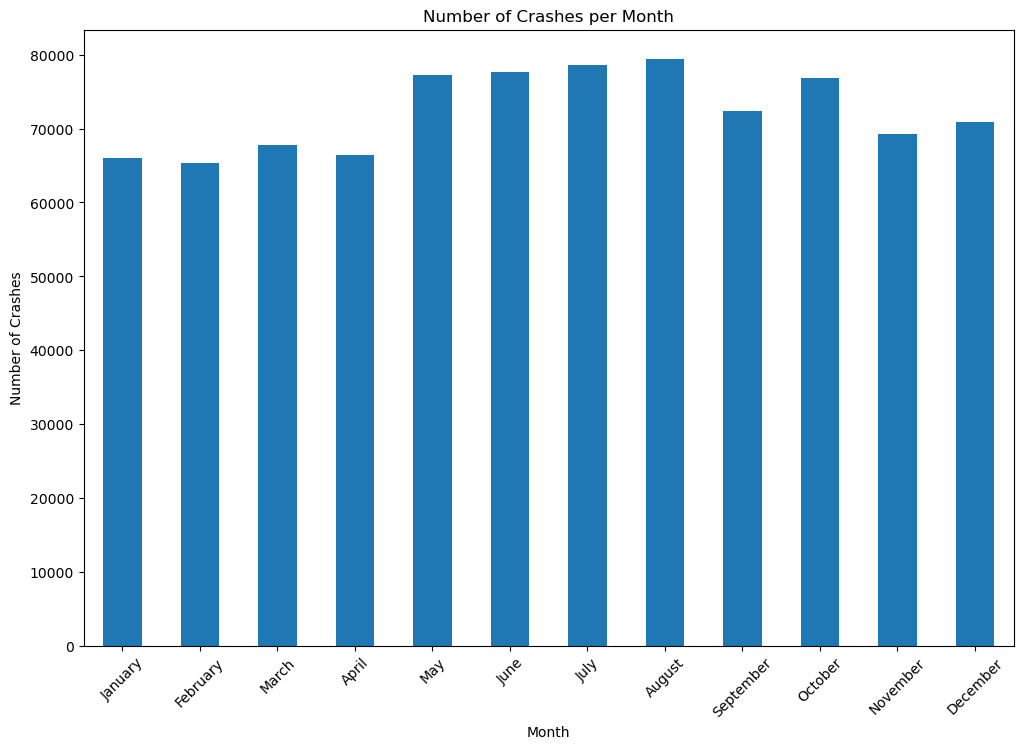

In [28]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['year'] = df['CRASH_DATE'].dt.year
df['month'] = df['CRASH_DATE'].dt.month
df['day'] = df['CRASH_DATE'].dt.day

plt.figure(figsize=(12, 8))
df.groupby('year').size().plot(kind='bar')
plt.title('Number of Crashes per Year')
plt.show()

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map the month numbers to month names in the DataFrame
df['month_name'] = df['CRASH_MONTH'].map(month_names)

plt.figure(figsize=(12, 8))
df.groupby('month_name').size().reindex(list(month_names.values())).plot(kind='bar')
plt.title('Number of Crashes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

df = df.drop(columns=['year', 'month', 'day', 'month_name'])

August is the peak month with alot of accidents

**Heatmaps:** Plot accidents on a map if you have latitude and longitude data

In [19]:
!pip install folium
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

map_center = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)

heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in df.dropna(subset=['LATITUDE', 'LONGITUDE']).iterrows()]
HeatMap(heat_data).add_to(accident_map)

accident_map.save('images/heatmap.html')

IFrame('images/heatmap.html', width=700, height=500)

In [29]:
#checking for the null values
df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 803363
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         668796
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       26469
CRASH_TYPE                            0
INTERSECTION_RELATED_I           668879
NOT_RIGHT_OF_WAY_I               828093
HIT_AND_RUN_I                    595810
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


Noticed null values over 800000 in columns PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I,              WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I and NOT_RIGHT_OF_WAY_I.            

## Data Preparation

### Choosing the Target variable

In [30]:
len(list(df.columns))

48

In [31]:
len(initial_columns)

48

In [32]:
for x in list(df.columns):
    if x not in initial_columns:
        print(x)

In [33]:
#checking the value counts
df['CRASH_TYPE'].value_counts()

CRASH_TYPE
NO INJURY / DRIVE AWAY              634907
INJURY AND / OR TOW DUE TO CRASH    232904
Name: count, dtype: int64

- Target variable is the 'CRASH_TYPE' column which will be renamed 'SEVERE'.
- The severity of the crash will be determined on whether or not their is an injury / a car being towed.
- This column will be a binary column with 0 representing no injury and 1 representing an injury.

In [34]:
df.rename(columns = {'CRASH_TYPE': 'SEVERE'}, inplace = True)
df['SEVERE'] = df['SEVERE'].map(lambda x:1 if x == 'INJURY AND / OR TOW DUE TO CRASH' else 0)

In [35]:
df['SEVERE'].value_counts()

SEVERE
0    634907
1    232904
Name: count, dtype: int64

**Changing the datatype of the 'CRASH_DATE' column from object to date.**

In [36]:
df['CRASH_DATE'] = pd.to_datetime(df.CRASH_DATE)

In [37]:
df.head(2)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,SEVERE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,1,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,0,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)


**Checking the value counts of multiple columns using for loop** 

In [38]:
# finding value_counts of columns using for loop
columns=['INTERSECTION_RELATED_I','ALIGNMENT','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
         'WORK_ZONE_I','MOST_SEVERE_INJURY','FIRST_CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE']
for i in columns:
    print(df[i].value_counts())
    print('_________________________________________________________________')

INTERSECTION_RELATED_I
Y    189438
N      9494
Name: count, dtype: int64
_________________________________________________________________
ALIGNMENT
STRAIGHT AND LEVEL       847152
STRAIGHT ON GRADE         10626
CURVE, LEVEL               6160
STRAIGHT ON HILLCREST      2213
CURVE ON GRADE             1284
CURVE ON HILLCREST          376
Name: count, dtype: int64
_________________________________________________________________
NOT_RIGHT_OF_WAY_I
Y    36066
N     3652
Name: count, dtype: int64
_________________________________________________________________
HIT_AND_RUN_I
Y    260335
N     11666
Name: count, dtype: int64
_________________________________________________________________
WORK_ZONE_I
Y    3784
N    1119
Name: count, dtype: int64
_________________________________________________________________
MOST_SEVERE_INJURY
NO INDICATION OF INJURY     744828
NONINCAPACITATING INJURY     68106
REPORTED, NOT EVIDENT        37409
INCAPACITATING INJURY        14593
FATAL                

**Changing the column values to binary i.e(0 or 1) instead of (Y or N) using the lambda
function in columns INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I and
WORK_ZONE_I.**

In [39]:
#lambda fuction to change values to binary
df['INTERSECTION_RELATED_I'] = df['INTERSECTION_RELATED_I'].map(lambda x: 1 if x=='Y' else 0)
df['NOT_RIGHT_OF_WAY_I'] = df['NOT_RIGHT_OF_WAY_I'].map(lambda x:1 if x=='Y' else 0)
df['HIT_AND_RUN_I'] =df['HIT_AND_RUN_I'].map(lambda x:1 if x=='Y' else 0)

In [40]:
#replacing null values with 0 and lambda function to convert values to binary
df['WORK_ZONE_I'].fillna(0, inplace=True)
df['WORK_ZONE_I'] =df['WORK_ZONE_I'].map(lambda x:1 if x=='Y' else 0)

**Replacing null values with 0 in multiple columns using for loop**

In [41]:
#filling nu
col=['INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING',
     'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION','LANE_CNT' ]
for i in col:
    df[i].fillna(0, inplace=True)

**Dropping the inconclusive columns**

In [42]:
#dropping the columns which are inconclusive
drop_list = ['CRASH_DATE_EST_I','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
             'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 
             'DOORING_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I','LATITUDE', 
             'LONGITUDE','CRASH_RECORD_ID','INJURIES_UNKNOWN','STREET_NO',
             'MOST_SEVERE_INJURY','SEC_CONTRIBUTORY_CAUSE','LOCATION','STREET_NAME']
df.drop(columns = drop_list, inplace = True)

In [43]:
#printing the shape of dataframe after droppin the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867811 entries, 0 to 867810
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_DATE                     867811 non-null  datetime64[ns]
 1   POSTED_SPEED_LIMIT             867811 non-null  int64         
 2   TRAFFIC_CONTROL_DEVICE         867811 non-null  object        
 3   DEVICE_CONDITION               867811 non-null  object        
 4   WEATHER_CONDITION              867811 non-null  object        
 5   LIGHTING_CONDITION             867811 non-null  object        
 6   FIRST_CRASH_TYPE               867811 non-null  object        
 7   TRAFFICWAY_TYPE                867811 non-null  object        
 8   LANE_CNT                       867811 non-null  float64       
 9   ALIGNMENT                      867811 non-null  object        
 10  ROADWAY_SURFACE_COND           867811 non-null  object        
 11  

**Capped the continuous values of the column 'INJURIES_NO_INDICATION ' greater than 7
 assigned to 7**

In [44]:
#capped to 7
print(df['INJURIES_NO_INDICATION'].value_counts())
df['INJURIES_NO_INDICATION'].values[df['INJURIES_NO_INDICATION'] > 7] =7
print(df['INJURIES_NO_INDICATION'].value_counts())

INJURIES_NO_INDICATION
2.0     402432
1.0     265555
3.0     109188
4.0      40803
0.0      20378
5.0      17146
6.0       7102
7.0       2774
8.0       1232
9.0        512
10.0       243
11.0       116
12.0        74
13.0        45
14.0        41
15.0        23
16.0        21
17.0        16
20.0        13
19.0         9
21.0         7
29.0         7
26.0         6
37.0         6
22.0         6
18.0         5
30.0         5
36.0         4
31.0         4
24.0         4
27.0         4
28.0         3
25.0         3
42.0         3
33.0         2
34.0         2
45.0         2
32.0         2
40.0         2
41.0         1
35.0         1
23.0         1
50.0         1
49.0         1
43.0         1
48.0         1
38.0         1
61.0         1
46.0         1
39.0         1
Name: count, dtype: int64
INJURIES_NO_INDICATION
2.0    402432
1.0    265555
3.0    109188
4.0     40803
0.0     20378
5.0     17146
6.0      7102
7.0      5207
Name: count, dtype: int64


**Capped the continuous values of the column 'NUM_UNITS' greater than 6
 assigned to 6**

In [45]:
# capped at 6
print(df['NUM_UNITS'].value_counts())
df['NUM_UNITS'].values[df['NUM_UNITS'] > 6] = 6
print(df['NUM_UNITS'].value_counts())

NUM_UNITS
2     759556
3      47924
1      47751
4       9269
5       2266
6        647
7        220
8         98
9         39
10        17
11         8
18         5
12         5
14         2
16         2
13         1
15         1
Name: count, dtype: int64
NUM_UNITS
2    759556
3     47924
1     47751
4      9269
5      2266
6      1045
Name: count, dtype: int64


**Capped the continuous values of the column 'INJURIES_TOTAL' greater than 5
 assigned to 5**

In [46]:
#capped to 5
print(df['INJURIES_TOTAL'].value_counts())
df['INJURIES_TOTAL'].values[df['INJURIES_TOTAL'] > 5] = 5
print(df['INJURIES_TOTAL'].value_counts())

INJURIES_TOTAL
0.0     746751
1.0      91022
2.0      20300
3.0       6176
4.0       2217
5.0        790
6.0        305
7.0        125
8.0         51
9.0         27
10.0        15
11.0         9
15.0         7
12.0         6
21.0         4
13.0         2
17.0         1
14.0         1
19.0         1
16.0         1
Name: count, dtype: int64
INJURIES_TOTAL
0.0    746751
1.0     91022
2.0     20300
3.0      6176
4.0      2217
5.0      1345
Name: count, dtype: int64


**Merging and replacing the values of the column WEATHER_CONDITION to reduced the categorical values in the column.**
- UNKNOWN and OTHER to UNKNOWN/OTHER
- FREEZING RAIN/DRIZZLE to SLEET/HAIL
- BLOWING SNOW to SNOW
- SEVERE CROSS WIND GATE to CLOUDY/OVERCAST
- BLOWING SAND, SOIL, DIRT to UNKNOWN/OTHER

In [47]:
#printing the value counts
df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       682119
RAIN                         75647
UNKNOWN                      48845
SNOW                         28399
CLOUDY/OVERCAST              25398
OTHER                         2709
FREEZING RAIN/DRIZZLE         1733
FOG/SMOKE/HAZE                1347
SLEET/HAIL                    1010
BLOWING SNOW                   444
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: count, dtype: int64

In [48]:
#merging the values  and printing the value counts after merge
df['WEATHER_CONDITION'] = df['WEATHER_CONDITION'].replace({'UNKNOWN':'UNKNOWN/OTHER','OTHER':'UNKNOWN/OTHER',
                                                     'FREEZING RAIN/DRIZZLE': 'SLEET/HAIL',
                                                     'BLOWING SNOW': 'SNOW',
                                                      'SEVERE CROSS WIND GATE': 'CLOUDY/OVERCAST',
                                                     'BLOWING SAND, SOIL, DIRT': 'UNKNOWN/OTHER'})
df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR              682119
RAIN                75647
UNKNOWN/OTHER       51561
SNOW                28843
CLOUDY/OVERCAST     25551
SLEET/HAIL           2743
FOG/SMOKE/HAZE       1347
Name: count, dtype: int64

**Merging and replacing the values of the column 'ROADWAY_SURFACE_COND'  to reduced the categorical values in the column.**
- UNKNOWN  - UNKNOWN/OTHER
- OTHER    - UNKNOWN/OTHER
- SAND, MUD, DIRT - UNKNOWN/OTHER
- ICE   -  SNOW OR SLUSH

In [49]:
#printing the value_counts
df['ROADWAY_SURFACE_COND'].value_counts()

ROADWAY_SURFACE_COND
DRY                641531
WET                114363
UNKNOWN             75641
SNOW OR SLUSH       28126
ICE                  5659
OTHER                2177
SAND, MUD, DIRT       314
Name: count, dtype: int64

In [50]:
#merging the values and printing the new value counts
df['ROADWAY_SURFACE_COND'] =df['ROADWAY_SURFACE_COND'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                                                                 'OTHER':'UNKNOWN/OTHER',
                                                               'SAND, MUD, DIRT': 'UNKNOWN/OTHER',
                                                                 'ICE': 'SNOW OR SLUSH'})
df['ROADWAY_SURFACE_COND'].value_counts()

ROADWAY_SURFACE_COND
DRY              641531
WET              114363
UNKNOWN/OTHER     78132
SNOW OR SLUSH     33785
Name: count, dtype: int64

**Merging and replacing the values of the column 'TRAFFIC_CONTROL_DEVICE'  to reduced the categorical values in the column.**
- UNKNOWN - UNKNOWN/OTHER
- OTHER - UNKNOWN/OTHER
- FLASHING CONTROL SIGNAL- STOP SIGN/FLASHER
- OTHER RAILROAD CROSSING - RAILROAD CROSSING GATE

In [51]:
#printing value_counts
df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 492154
TRAFFIC SIGNAL              240615
STOP SIGN/FLASHER            85970
UNKNOWN                      35993
OTHER                         5894
YIELD                         1305
LANE USE MARKING              1226
OTHER REG. SIGN               1029
OTHER WARNING SIGN             701
PEDESTRIAN CROSSING SIGN       586
RAILROAD CROSSING GATE         560
FLASHING CONTROL SIGNAL        357
DELINEATORS                    347
SCHOOL ZONE                    325
POLICE/FLAGMAN                 293
OTHER RAILROAD CROSSING        189
RR CROSSING SIGN               182
NO PASSING                      54
BICYCLE CROSSING SIGN           31
Name: count, dtype: int64

In [52]:
#merging and replacing values, printing the new value counts
df['TRAFFIC_CONTROL_DEVICE']=df['TRAFFIC_CONTROL_DEVICE'].replace(
                            {'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER',
                            'FLASHING CONTROL SIGNAL':'STOP SIGN/FALSHER',
                              'OTHER RAILROAD CROSSING':'RAILROAD CROSSING GATE'})
df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 492154
TRAFFIC SIGNAL              240615
STOP SIGN/FLASHER            85970
UNKNOWN/OTHER                41887
YIELD                         1305
LANE USE MARKING              1226
OTHER REG. SIGN               1029
RAILROAD CROSSING GATE         749
OTHER WARNING SIGN             701
PEDESTRIAN CROSSING SIGN       586
STOP SIGN/FALSHER              357
DELINEATORS                    347
SCHOOL ZONE                    325
POLICE/FLAGMAN                 293
RR CROSSING SIGN               182
NO PASSING                      54
BICYCLE CROSSING SIGN           31
Name: count, dtype: int64

**Merging and replacing the values of the column 'ROAD_DEFECT'  to reduced the categorical values in the column.**
- UNKNOWN - UNKNOWN/OTHER
- OTHER    -UNKNOWN/OTHER

In [53]:
#Printing value counts
df['ROAD_DEFECT'].value_counts()

ROAD_DEFECT
NO DEFECTS           693937
UNKNOWN              157171
RUT, HOLES             6252
OTHER                  4711
WORN SURFACE           3574
SHOULDER DEFECT        1526
DEBRIS ON ROADWAY       640
Name: count, dtype: int64

In [54]:
#merging and replacing the values 
df['ROAD_DEFECT'] = df['ROAD_DEFECT'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER'})
#printing the new value counts
df['ROAD_DEFECT'].value_counts()

ROAD_DEFECT
NO DEFECTS           693937
UNKNOWN/OTHER        161882
RUT, HOLES             6252
WORN SURFACE           3574
SHOULDER DEFECT        1526
DEBRIS ON ROADWAY       640
Name: count, dtype: int64

**Merging and replacing the values of the column 'TRAFFICWAY_TYPE' to reduced the categorical values in the column.**
- T-INTERSECTION - INTERSECTION
- UNKNOWN INTERSECTION TYPE - INTERSECTION
- Y-INTERSECTION - INTERSECTION
- L-INTERSECTION - INTERSECTION
- FIVE POINT, OR MORE - INTERSECTION
- FOUR WAY - INTERSECTION
- ROUNDABOUT - INTERSECTION 
- OTHER - UNKNOWN/OTHER
- UNKNOWN - UNKNOWN/OTHER
- NOT REPORTED- UNKNOWN/OTHER
- TRAFFIC ROUTE - UNKNOWN/OTHER

In [55]:
#printing value counts
df['TRAFFICWAY_TYPE'].value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        374827
DIVIDED - W/MEDIAN (NOT RAISED)    137676
ONE-WAY                            110174
PARKING LOT                         58924
FOUR WAY                            58224
DIVIDED - W/MEDIAN BARRIER          49256
OTHER                               23569
ALLEY                               14314
T-INTERSECTION                      11600
UNKNOWN                             10174
CENTER TURN LANE                     6201
DRIVEWAY                             2813
RAMP                                 2723
UNKNOWN INTERSECTION TYPE            2643
FIVE POINT, OR MORE                  1282
Y-INTERSECTION                       1262
TRAFFIC ROUTE                        1043
NOT REPORTED                          638
ROUNDABOUT                            288
L-INTERSECTION                        180
Name: count, dtype: int64

In [56]:
# merged the different types of intersections into one feature and unknown/other into one feature
df['TRAFFICWAY_TYPE'] = df['TRAFFICWAY_TYPE'].replace({'T-INTERSECTION':'INTERSECTION', 'UNKNOWN INTERSECTION TYPE':'INTERSECTION',
                                                'Y-INTERSECTION':'INTERSECTION','L-INTERSECTION':'INTERSECTION',
                                                 'FIVE POINT, OR MORE': 'INTERSECTION', 'FOUR WAY':'INTERSECTION',
                                                 'ROUNDABOUT': 'INTERSECTION', 'OTHER': 'UNKNOWN/OTHER',
                                                'UNKNOWN':'UNKNOWN/OTHER','NOT REPORTED':'UNKNOWN/OTHER',
                                                'TRAFFIC ROUTE':'UNKNOWN/OTHER'})
#printing new value counts
df.TRAFFICWAY_TYPE.value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        374827
DIVIDED - W/MEDIAN (NOT RAISED)    137676
ONE-WAY                            110174
INTERSECTION                        75479
PARKING LOT                         58924
DIVIDED - W/MEDIAN BARRIER          49256
UNKNOWN/OTHER                       35424
ALLEY                               14314
CENTER TURN LANE                     6201
DRIVEWAY                             2813
RAMP                                 2723
Name: count, dtype: int64

### Feature Engineering

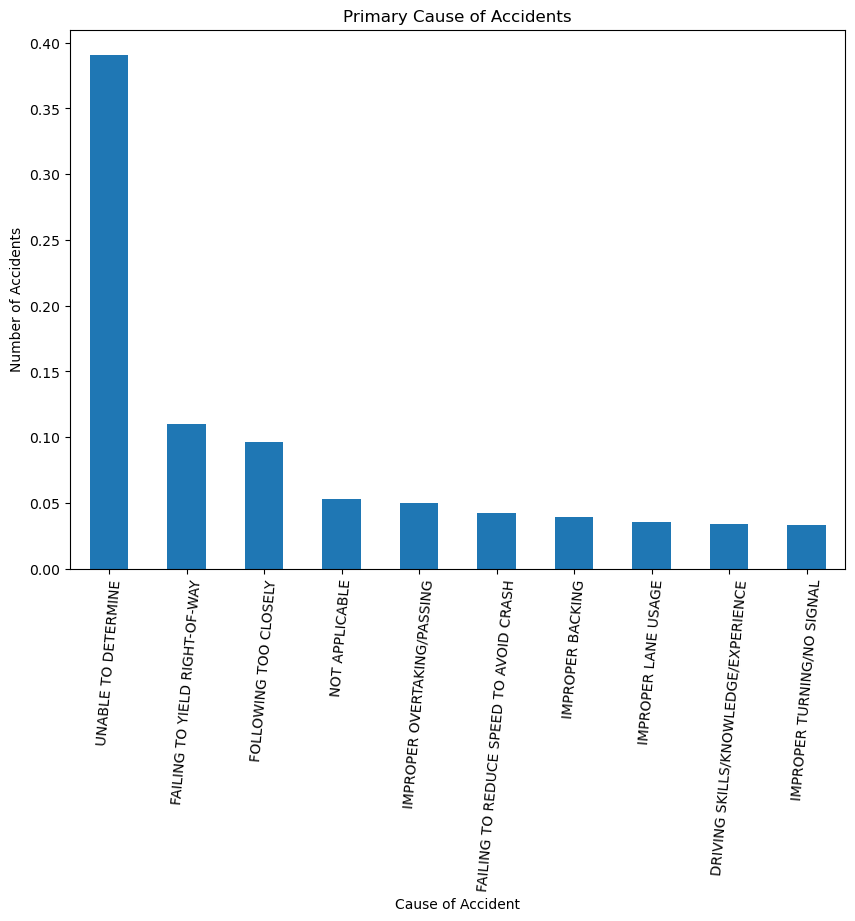

In [57]:
#bar plot of Primary contributory cause
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=85);


**Primary cause  of most of the accidents is unable to determine.**

Binning the column CRASH_MONTH to seasons and added a 'SEASON' column to dataframe.

In [58]:
#binning the CRASH_MONTH
month_bins = [1,4,7,10,13]
label=('Winter','Spring','Summer','Fall')
month_binned = pd.cut(df['CRASH_MONTH'], month_bins, labels= label)
month_binned= month_binned.cat.as_unordered()
df['SEASON']= month_binned

In [59]:
df['SEASON'].value_counts()

SEASON
Spring    233502
Summer    228643
Winter    199507
Fall      140093
Name: count, dtype: int64

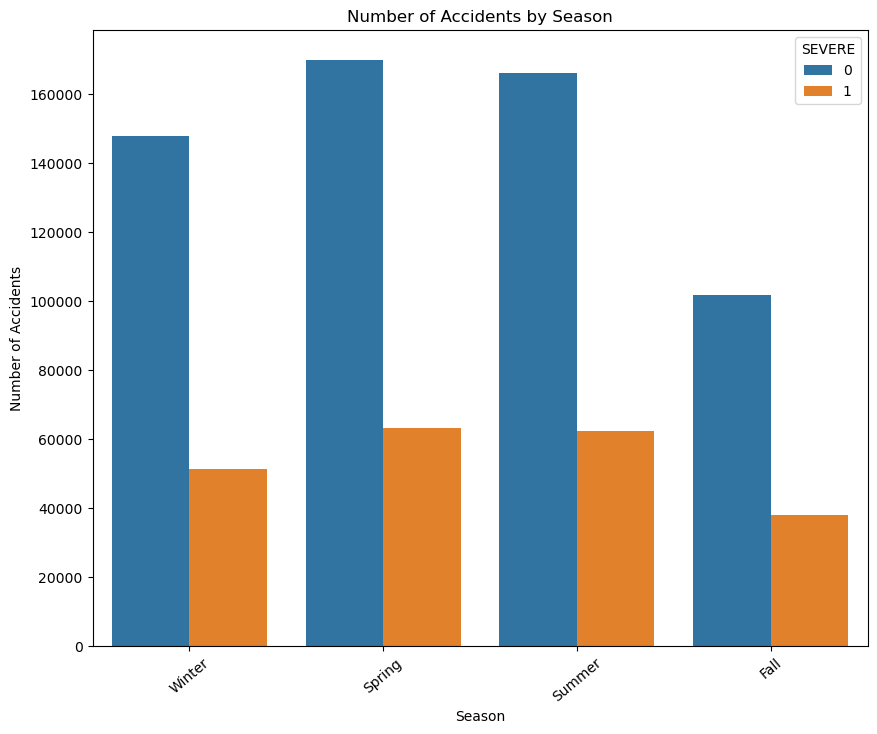

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(x="SEASON", data=df, hue="SEVERE")
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);

**Looking at the graph, most number of accidents occurred in summer**

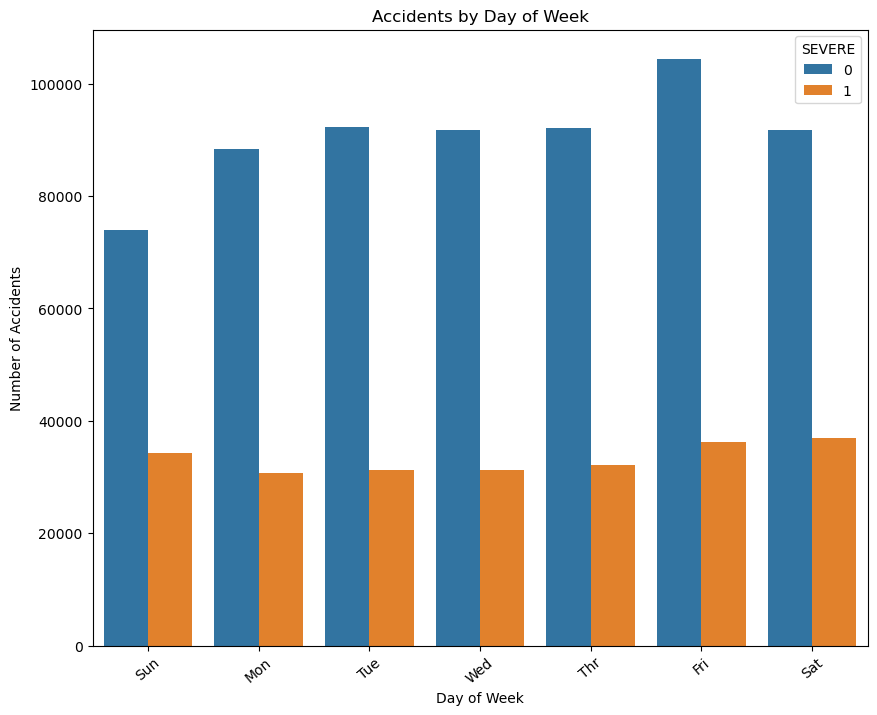

In [61]:
#counterplot of CRASH_DAY_OF_WEEK
plt.figure(figsize=(10,8))
sns.countplot(x= "CRASH_DAY_OF_WEEK" , data=df, 
              hue="SEVERE")
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(7), ('Sun','Mon','Tue','Wed','Thr','Fri','Sat'), 
           rotation=40);

**It seems most accidents occurred on weekend mainly(Friday and Saturday).**

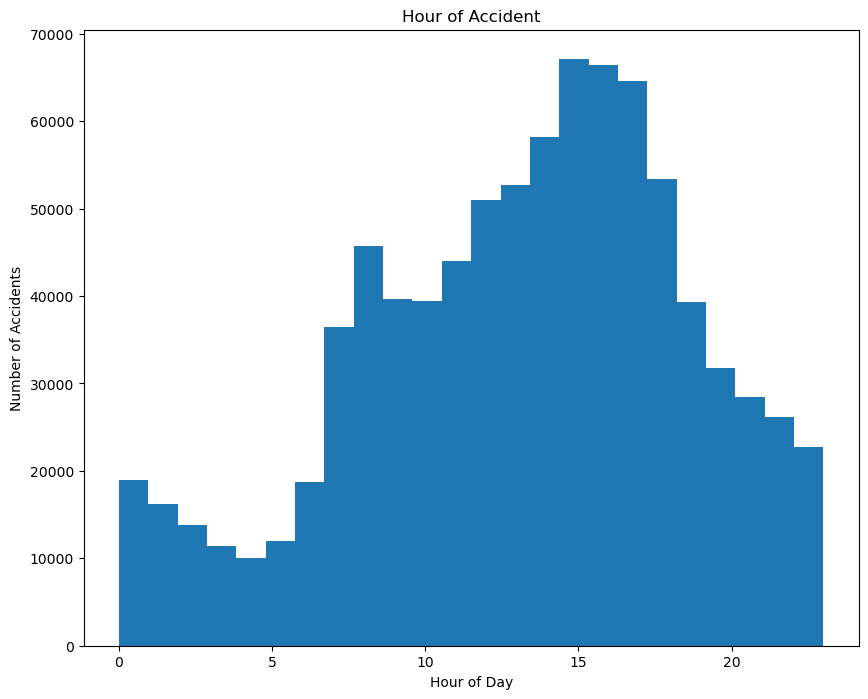

In [62]:
# CRASH_HOUR histogram plot
plt.figure(figsize=(10,8))
df['CRASH_HOUR'].plot(kind = 'hist', bins = 24)
plt.title('Hour of Accident')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

**Noticed increased number of the accidents in the rush hour.**

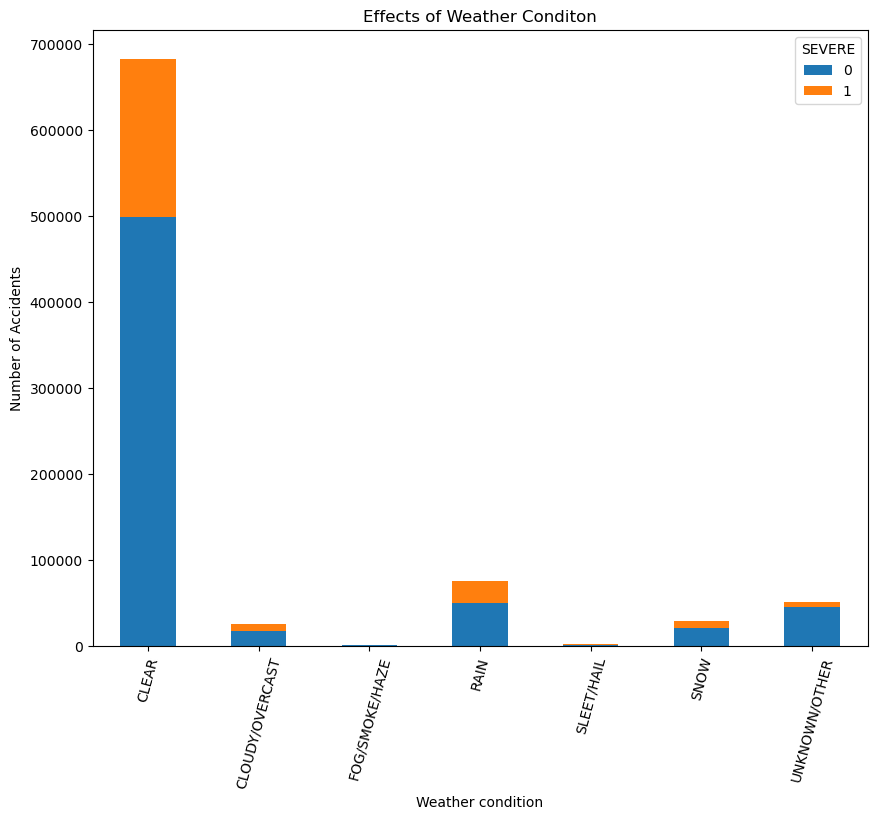

In [63]:
#bar plot of WEATHER_CONDITION
weather = df.groupby(['WEATHER_CONDITION', 'SEVERE'])['WEATHER_CONDITION'].count().unstack()
weather.plot( kind='bar', stacked=True, figsize =(10,8))
plt.title('Effects of Weather Conditon')
plt.xlabel('Weather condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75);

**Most accidents occurred in a clear weather condition**

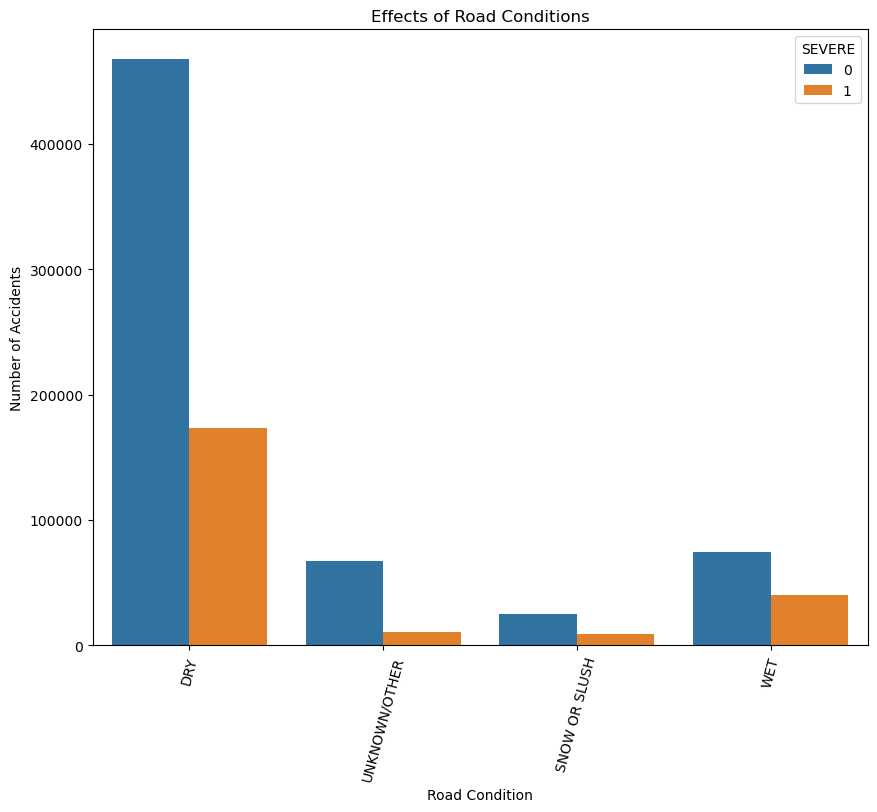

In [64]:
#counter plot of RAODWAY_SURFACE_COND
plt.figure(figsize=(10,8))
sns.countplot(x="ROADWAY_SURFACE_COND", data=df, hue="SEVERE")
plt.title('Effects of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75);

**Noticed most accidents happened in a DRY Road condition.**

**Counter plot of Damage cost**

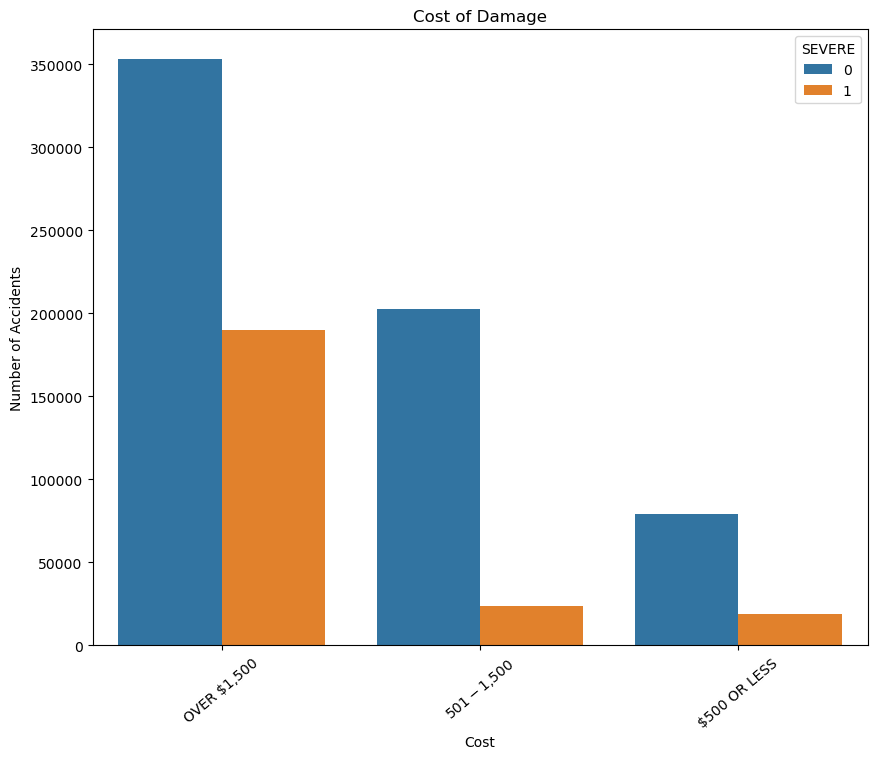

In [65]:
#counter plot of DAMAGE
plt.figure(figsize=(10,8))
sns.countplot(x="DAMAGE", data=df, hue="SEVERE")
plt.title('Cost of Damage')
plt.xlabel('Cost')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);

**Large number of accidents as damage over $1500.**

**Creating the dummies for categorical columns**

In [66]:
#creating the dummies
dummies=['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT','SEASON',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE']
df =  pd.get_dummies(df, columns = dummies, drop_first = True )

In [67]:
#printing the dataframe after the scrubbing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867811 entries, 0 to 867810
Columns: 136 entries, CRASH_DATE to PRIM_CONTRIBUTORY_CAUSE_WEATHER
dtypes: bool(118), datetime64[ns](1), float64(7), int64(10)
memory usage: 216.8 MB


In [68]:
#saving and converting the cleaned dataframe to csv file
df.to_csv('data/carcrash_cleaned_data.csv', index=False)